### 1. Introduction to DataSet "police.csv"

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ri = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/police.csv")

In [5]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Q. What does each row represent??

Ans. It represents a traffic stop by a policeman for violating traffic rules

In [7]:
ri.shape # 91741 rows and 15 columns

(91741, 15)

In [9]:
ri.dtypes

# objects are strings mostly. But they can also be arbitary python objects like list, dictionary
# Floats are numbers
# Bool are True or False values

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [10]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Q. The column "County name" has "NaN" values. What could be the reason for all the values being "NaN"?

Ans. 1. The County names would not have been recorded at the time of stopping.
     2. Could be data corruption.
     
     3. May be it was an irrelevant value.

Q. Whats the use of putiing NaN? We can leave the cell blank or can put 0 if nothing was present in that cell.

Ans. We want to be able distinguish the missing data from the real data. Hence we use NaN. (Eg: if we put unknown in the string to search number of unknown data pts and if someones last name is unknown, then machine wont be able to distinguish that)

In [16]:
ri.isnull().sum() #number of Na values or missing data in each of the columns

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### 2. Remove the Column that only contains missing values

In [19]:
ri.drop("county_name", axis = 1, inplace = True)

In [20]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [21]:
ri.shape

(91741, 14)

In [22]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

#### Take away from lesson 2: Remove the column that only contains missing values

1. Pay attention to default arguments. (Eg: Check for axis parameter if True or false, if inplace is True or False)
2. Check your work if the command you have given has worked or not
3. There is more than one way of doing everything in Pandas

### 3. Comparing Groups: Do men or women speed more often? 

###### Pay attention to the following columns:
1. driver_gender
2. violation

In [3]:
import pandas as pd
ri = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/police.csv")
ri.drop("county_name", axis = 1, inplace = True)

In [4]:
# We will filter the data with violation == Speeding and then pull the driver_gender column. In that, we do value_counts of 
# men and women

ri[ri.violation == "Speeding"].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [5]:
# To convert the above value to percentage (normalize = True)
ri[ri.violation == "Speeding"].driver_gender.value_counts(normalize = True)

#Terefore, when a person is stopped for speeding, 68% that is, 32979 are male and 32% that is 15482 are female

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [6]:
# Another way to look at this problem is: When a male or female is stopped, how many times are they stopped for speeding?

ri[ri.driver_gender == "M"].violation.value_counts(normalize = True)

# Hence, when a male is stopped, 52% of the times he was stopped for speeding

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [8]:
#Similarly for female:

ri[ri.driver_gender == "F"].violation.value_counts(normalize = True)

# Hence, when a male is stopped, 52% of the times he was stopped for speeding

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [9]:
# We can combine the above two commands using a groupby function

ri.groupby("violation").driver_gender.value_counts()

violation            driver_gender
Equipment            M                 8533
                     F                 2487
Moving violation     M                13020
                     F                 3204
Other                M                 3627
                     F                  690
Registration/plates  M                 2419
                     F                 1013
Seat belt            M                 2317
                     F                  635
Speeding             M                32979
                     F                15482
Name: driver_gender, dtype: int64

In [10]:
ri.groupby("driver_gender").violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

###### Take away from lesson 3: There is more than one way to understand a question

- There is more than one way to understand a question

### 4. Examining relationships between series: Does gender affect who gets searched during a stop

Relevant columns:
  
  -driver_gender
  
  -search_conducted

In [13]:
ri.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [14]:
## Done by self

ri[ri.search_conducted == True].driver_gender.value_counts(normalize = True)

M    0.852628
F    0.147372
Name: driver_gender, dtype: float64

In [15]:
## From the result, 85% male were searched when they were stopped and 15% women were searched after stopping.
## Hence we can conclude that Gender does affect if the person will be searched or not

In [16]:
## As shown in the video: [Breaking down the problem statement]

#Step1: We will first see how many times did the police search the vehicle when the vehicle was stopped

ri.search_conducted.value_counts(normalize = True)

# This means 96% times they did not search the vehicle

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [17]:
## Trick: If we are doing a value counts on a boolean column, We can always do .sum to get number of 1's 
## and mean to get percentage of 1's

ri.search_conducted.mean()

0.03483720473942948

In [18]:
# Now we shall groupby:

ri.groupby("driver_gender").search_conducted.value_counts(normalize = True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [20]:
## There could be a possibility that females are commiting a smaller violation (eg: not wearing seatbelt) 
## and males are committing a more serious violation (speeding). Lets groupby using two parameters

ri.groupby(["violation", "driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [21]:
## From the above code we can conclude that male drivers are searched more in case of all the violation. Hence search indeed 
## depends on gender.

Take away from lesson 4: Examining Relationships
    
    - Causation is difficult to conclude hence focus on relationshiops
    - include all relevant factors while studying a relationship

### 5: Handling missing values: Why is search_type missing so often??

In [22]:
ri.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

Q. Why is the search_type missing 88545 times?

Ans. We think that 88545 times there was no search done. Hence the value is NaN.

In [25]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

Take away from lesson 5: Handling missing values
    
    - Pandas usually ignores null values and returns an empty series
    - To check the number of null values, we have to 

### 6. During a search, how often is the driver frisked??



In [1]:
import pandas as pd
ri = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/police.csv")

In [2]:
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [ ]:
# In some cases, there are multiple search_types done which are seperated by commas(,). We need to consider them as well

In [7]:
#We shall make use of string methods

ri["Frisk"] = ri.search_type.str.contains("Protective Frisk")

In [11]:
ri.Frisk.value_counts(dropna = False) # There were 274 instances of the driver being frisked

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

In [13]:
ri.Frisk.sum()

274

In [14]:
ri.Frisk.mean() ## Out of the total searches, 8% of the time, the person was frisked

0.08573216520650813

###### Take away from lesson 6: Using String Methods

- Using string methods to find the partial matches.
- Use the correct denominator while calculating rate
- Pandas calculation ignores Missing Values
- Apply the "smell test" to your results (Does this make sense in the real world? If not, then check your code)

### 7. Combining Date and Time: Which year had the least number of stops?

In [17]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
Frisk                  object
dtype: object

In [16]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [19]:
ri.stop_date.str.slice(0,4).value_counts()

# From the below results, least number of stops were done in 2005

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [20]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

# Make a series named combines and concatinate stop_date with stop_time seperated by a space

In [21]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [24]:
## Converting the combined series which is an object, to a date_time datatype

ri["stop_datetime"] = pd.to_datetime(combined)

In [25]:
ri.dtypes

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
Frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [28]:
ri.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

###### Take away from lesson 7: Combining dates and time

- Consider removing chunks of data that may be biased (2558 stops in 2005 seems very small when compared to other years. Hence we should consider dropping it)
- Use the date-time datatype for dates and time.

### 8. Plotting a time series - How does drug activity change by the time of day??

Focus on 
- stop_datetime
- drugs_related_stop

In [29]:
ri.drugs_related_stop.dtype

dtype('bool')

In [31]:
ri.drugs_related_stop.mean() # This means less than 1% of the time, the stops were drugs related.

0.008883705213590434

In [32]:
## For each hour, what is the rate of drug related stop?

ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean() #Using mean as it is a boolean

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [33]:
# Import matplotlib and plot the time on the graph
import matplotlib.pyplot as plt
%matplotlib inline

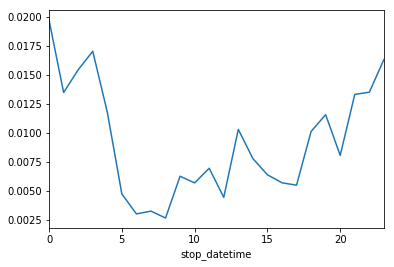

In [34]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

# Use line plot during DateTime series

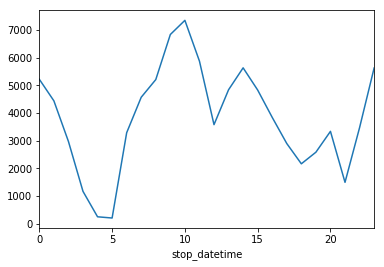

In [36]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.count().plot()

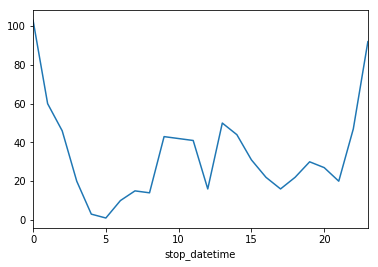

In [37]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

###### Take away from lesson 8: Plotting a time series

- Use plots to help you understand trends
- Create exploratory plots using Pandas one-liners

### 9. Creating Useful Plots: Do most stops occur at night?

In [38]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'Frisk',
       'stop_datetime'],
      dtype='object')

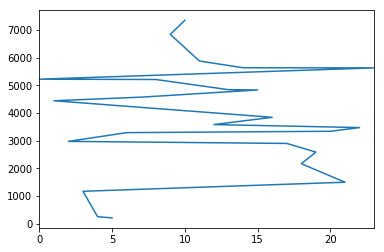

In [46]:
ri.stop_datetime.dt.hour.value_counts().plot()

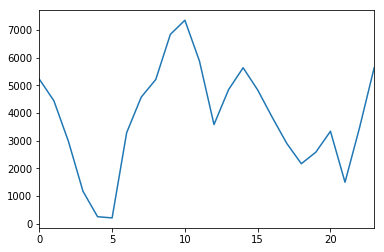

In [48]:
# To make this plot proper, we need to make use of sort_index

ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [49]:
## From the plot, we can say that most plots occur during the day i.e between 8 am to 10 am

###### Take away from lesson 9: Creating useful plots

- Be conscious of sorting when plotting because we dont sort the values, the plot will not be correct

### 10. Fixing Bad Data: Find the bad data in "stop_duration" column and fix it

In [51]:
ri.stop_duration.head()

0     0-15 Min
1     0-15 Min
2     0-15 Min
3    16-30 Min
4     0-15 Min
Name: stop_duration, dtype: object

In [53]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

###### What accounts as Bad data?
 - Do we think that missing data is a bad data? (Probably not)
 - The last 2 value_counts 1,2 are they minutes, are they hours?? Hence that is a bad data and we need to fix it

###### So the question arises, what does it mean to fix it and how do I do that??

- We can consider them as hours and then convert them to 60mins and 120 mins and then put them in 30+ mins slab
- We can remove those rows (drop them)
- We can replace them as missing

###### So if we want to replace that 1,2 with NaN then how do we do it?

- We can make use of replace method
- debug_my_code method

In [58]:
ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = "NaN"

# Things wrong with the above code

#- The code in [] must be in parentheses
#- 1 and 2 are not integers

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [59]:
ri[(ri.stop_duration == '1' )| (ri.stop_duration == '2')].stop_duration = "NaN"

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
## There is a warning 'SettingWithCopyWarning' and hence the code did not work. So we will use loc

ri.loc[(ri.stop_duration == '1' ) | (ri.stop_duration == '2'), 'stop_duration'] = "NaN"

In [70]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [71]:
# Now we can see that there are 2 NaN. 
# Here we have passed NaN as a string. But in reality, NaN is not a string
# Hence we make use of numpy to convert it to an actual missing value.

In [72]:
import numpy as np

In [73]:
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [77]:
ri.stop_duration.value_counts(dropna = False) # Hence we have converted the values to actual NaN

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64